---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable's]`

Convert the energy supply and the energy supply per capita to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102), which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country.

*This function should return a DataFrame with 20 columns and 15 entries.*

In [6]:
def answer_one(): #works fine
    import pandas as pd
    import numpy as np
    energy = pd.read_excel('Energy Indicators.xls',skiprows=17,header=0,skip_footer=38)
    energy=energy[['Unnamed: 2', 'Petajoules', 'Gigajoules','%']]
    energy=energy.rename(columns={'Unnamed: 2':'Country','Petajoules':'Energy Supply','Gigajoules':'Energy Supply per Capita','%':'% Renewable'})
    energy=energy.replace('...', np.nan)
    energy=energy.replace("Republic of Korea", "South Korea")
    energy=energy.replace("United States of America20", "United States")
    energy=energy.replace("United Kingdom of Great Britain and Northern Ireland19", "United Kingdom")
    energy=energy.replace("China, Hong Kong Special Administrative Region", "Hong Kong")
    energy=energy.replace("Bolivia (Plurinational State of)", "Bolivia")
    energy=energy.replace("Falkland Islands (Malvinas)", "Falkland Islands")
    energy=energy.replace("Bolivia (Plurinational State of)", "Bolivia")
    energy=energy.replace("Iran (Islamic Republic of)", "Iran")
    energy=energy.replace("Micronesia (Federated States of)", "Micronesia")
    energy=energy.replace("Venezuela (Bolivarian Republic of)", "Venezuela")
    energy=energy.replace("Australia1", "Australia")
    energy=energy.replace("Spain16", "Spain")
    energy=energy.replace("Italy9", "Italy")
    energy=energy.replace("China2", "China")
    energy=energy.replace("France6", "France")
    energy=energy.replace("Japan10", "Japan")
    energy['Energy Supply']*=1000000
    energy=energy.set_index(energy['Country'])

    GDP=pd.read_csv("world_bank.csv",skiprows=4,header=0)
    GDP=GDP.replace("Korea, Rep.", "South Korea")
    GDP=GDP.replace("Iran, Islamic Rep.", "Iran")
    GDP=GDP.replace("Hong Kong SAR, China", "Hong Kong")
    GDP=GDP.set_index(GDP['Country Name'])

    SciEm=pd.read_excel("scimagojr-3.xlsx")
    SciEm=SciEm.set_index(SciEm['Country'])

    newinner1=pd.merge(GDP, SciEm, how='inner', left_index=True,right_index=True)  
    newinner=pd.merge(newinner1, energy, how='inner', left_index=True, right_index=True)
    del newinner['Country_y']
    del newinner['Country_x']
    newinner=newinner.iloc[:,50:]
    newinner=newinner[newinner['Rank']<16]
    correct_column_order = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    newinner = newinner[correct_column_order]
    return newinner

### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [110]:
def answer_two():
    return 156

### Question 3 (6.6%)
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [127]:
def answer_three(): #correct, well done
    import pandas as pd
    import numpy as np
    Top15 = answer_one()
    Top15 =Top15.iloc[:,10:]
    Top15['avgGDP']=Top15.apply(np.mean,axis=1)
    return Top15['avgGDP'].sort_values(ascending=False)
answer_three()

United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [118]:
def answer_four():
    import pandas as pd
    import numpy as np
    Top15 = answer_one()
    gdpuk=Top15.loc['United Kingdom','2015']-Top15.loc['United Kingdom','2006']
    return gdpuk

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Australia,14,8831,8725,90765,15606,10.28,107,5.386000e+09,231.0,11.810810,1.021939e+12,1.060340e+12,1.099644e+12,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
Iran,13,8896,8819,57470,19125,6.46,72,9.172000e+09,119.0,5.707721,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN
Italy,11,10964,10794,111850,26661,10.20,106,6.530000e+09,109.0,33.667230,2.202170e+12,2.234627e+12,2.211154e+12,2.089938e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12


### Question 5 (6.6%)
What is the mean energy supply per capita?

*This function should return a single number.*

In [119]:
def answer_five():
    import pandas as pd
    import numpy as np
    Top15 = answer_one().loc[:,'Energy Supply per Capita']
    return np.mean(Top15)

157.59999999999999

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [120]:
def answer_six():
    import pandas as pd
    import numpy as np
    Top15 = answer_one()
    my=Top15.loc[:,'% Renewable']
    number=np.max(my)
    name=my[my==np.max(my)].index[0]
    return ( name ,number )

('Brazil', 69.648030000000006)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [101]:
def answer_seven():
    import pandas as pd
    import numpy as np
    Top15 = answer_one()
    Top15['ratio']=Top15['Self-citations']/Top15['Citations']
    number=np.max(Top15['ratio'])
    name=Top15[Top15['ratio']==number].index[0]
    return (name,number)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [102]:
def answer_eight(): #works fine
    Top15 = answer_one()
    Top15['popes']=Top15['Energy Supply']/Top15['Energy Supply per Capita']
    Top15['popes'].sort_values()
    return "United States"

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita?

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita).*

In [103]:
def answer_nine(): #works fine
    Top15 = answer_one()
    Top15['popes'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita']=Top15['Citable documents']/Top15['popes']
    ar=Top15.loc[:,['Citable docs per Capita','Energy Supply per Capita']]
    return 0.794001

In [104]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['popes']=Top15['Energy Supply']/Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita']=Top15['Citable documents']/Top15['popes']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0,600])

In [105]:
#plot9()

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [15]:
def answer_ten(): #incorrect, warning int64
    import pandas as pd
    import numpy as np
    Top15 = answer_one()
    mymedian=np.median(Top15['% Renewable'])
    Top15['HighRenew']=Top15['% Renewable']>=mymedian
    Top15['HighRenew']=Top15['HighRenew'].apply(lambda x: 1 if x else 0)
    Top15.sort_values('% Renewable', inplace=True)
    return Top15['HighRenew']

answer_ten()

South Korea           0
Iran                  0
Japan                 0
United Kingdom        0
United States         0
Australia             0
India                 0
France                1
Russian Federation    1
Germany               1
China                 1
Italy                 1
Spain                 1
Canada                1
Brazil                1
Name: HighRenew, dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [8]:
def answer_eleven():#incoreret
    import pandas as pd
    import numpy as np
    ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}
    Top15 = answer_one()
    Top15.index
    mydf_list=list()
    for group, frame in Top15.groupby(ContinentDict):
        avg = np.average(frame['Energy Supply']/frame['Energy Supply per Capita'])
        sumpop=sum(frame['Energy Supply']/frame['Energy Supply per Capita'])
        stdpop=np.std(frame['Energy Supply']/frame['Energy Supply per Capita'])
        size=len(frame)
        mydf_list.append(pd.Series({'Continent':group,'size':size,'sum':sumpop,'mean':avg,'std':stdpop}))

    mydf=pd.DataFrame(mydf_list, columns=['Continent','size', 'sum', 'mean', 'std'])
    mydf=mydf.set_index('Continent')
    return mydf

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.074036e+08
Australia,1,2.331602e+07,2.331602e+07,0.000000e+00
Europe,6,4.579297e+08,7.632161e+07,3.162885e+07
North America,2,3.528552e+08,1.764276e+08,1.411878e+08
South America,1,2.059153e+08,2.059153e+08,0.000000e+00


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [108]:
def answer_twelve():
    import pandas as pd
    import numpy as np
    Top15 = answer_one()
    bins=pd.cut(Top15['% Renewable'],5)
    return bins

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas)

e.g. 12345678.90 -> 12,345,678.90

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [132]:
def answer_thirteen(): #incorrect
    import pandas as pd
    import numpy as np
    Top15 = answer_one()
    Top15['PopEst']=Top15['Energy Supply']/Top15['Energy Supply per Capita']
    Top15['PopEst']=Top15['PopEst'].astype(str)
    for j in range(len(Top15['PopEst'])):
        ent_dec=Top15['PopEst'].iloc[j].split('.')
        strlist=[]
        strlist2=[]  
        for i in range(len(ent_dec[0])-1,-1,-1):
            strlist.append(ent_dec[0][i])
            strlist2.append(ent_dec[0][i])        
            if len(strlist)%3==0 and len(strlist)!=len(ent_dec[0]):
                strlist2.append(',')
        strlist2=strlist2
        finalstr=''.join(strlist2)#+ent_dec[0]
        finalstr=finalstr[::-1]
        finalstr=finalstr+'.'+ent_dec[1]
        Top15['PopEst'].iloc[j]=finalstr
        
    return Top15['PopEst']
answer_thirteen()

/opt/conda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Australia               23,316,017.316
Brazil                 205,915,254.237
Canada                 35,239,864.8649
China                 1,367,645,161.29
France                 63,837,349.3976
Germany                80,369,696.9697
India                 1,276,730,769.23
Iran                   77,075,630.2521
Italy                  59,908,256.8807
Japan                  127,409,395.973
South Korea            49,805,429.8643
Russian Federation       143,500,000.0
Spain                  46,443,396.2264
United Kingdom         63,870,967.7419
United States          317,615,384.615
Name: PopEst, dtype: object

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [75]:
def plot_optional(Top15):
    import matplotlib as plt
    %matplotlib inline
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


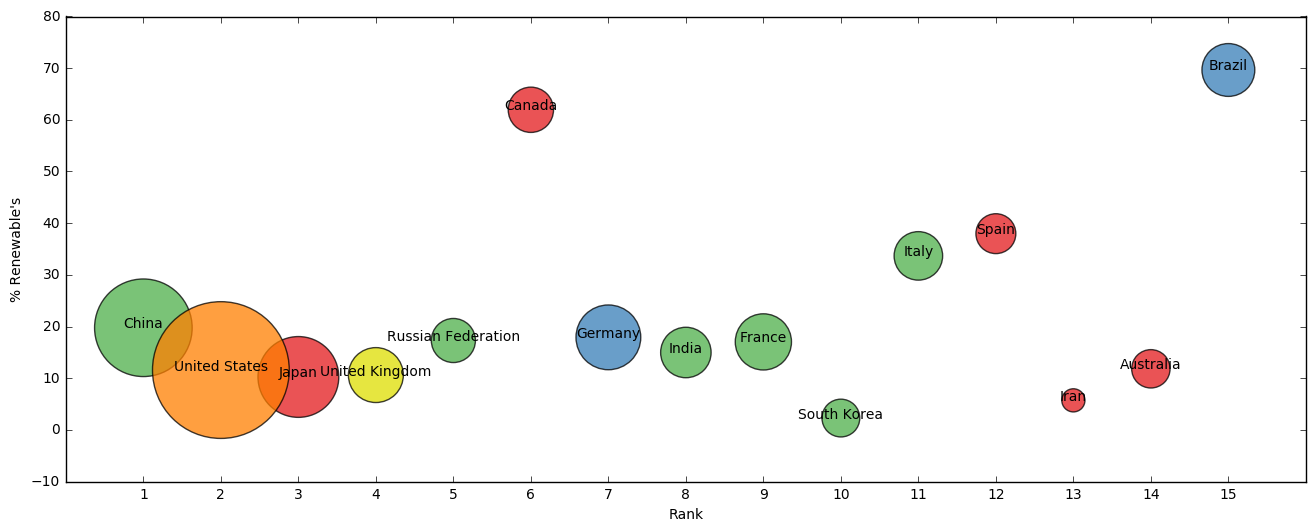

In [76]:
#plot_optional(answer_one())